In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
def read_all_file_paths(list_of_files:list, start:int=None, end:int=None)->list:
  """
  Read a list of all of the file paths

  Args:
      list_of_files:List

  Returns:
      List
  """
  
  if start and end:
    year_columns = [str(year) for year in range(start, end+1)]
    drop_columns = new_columns + year_columns
  else:
    year_columns = [str(year) for year in range(1950, 2023)]
  
  new_columns = ['country', 'debt']
  list_of_dfs = []
  col_names = new_columns + year_columns
  
  
  for file in list_of_files:
    
    df = pd.read_csv(file + ".csv", encoding = "ISO-8859-1")
    df.fillna(0, inplace = True)
    
    if start and end:
      df.drop(columns=[col for col in df.columns if col not in drop_columns], inplace=True, axis=1)
      
    df.columns = col_names
    
    df['std_per_year'] = df[year_columns].std(axis=1)
    
    list_of_dfs.append(df)
  
  return list_of_dfs

def plot_debt_graph(df:pd.DataFrame)->None:
  """
  Takes in Dataframe and displays visulization

  Args:
      df (pd.DataFrame)
  """
  year_columns = [str(year) for year in range(1950, 2023)]
  # Summing debt across all countries for each year
  annual_debt = df[year_columns].sum()

  # Plotting
  plt.figure(figsize=(15, 6))
  sns.lineplot(x=annual_debt.index, y=annual_debt.values)
  plt.title('Total Debt from 1950 to 2022')
  plt.xlabel('Year')
  plt.ylabel('Total Debt')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()
  
def plot_by_country_name(country:str, df:pd.DataFrame)->None:
    """Plots country debt by name

    Args:
        country (str):
        df (pd.DataFrame):
    """
    
    year_columns = [str(year) for year in range(1950, 2023)]

    # Set the figure size and layout
    plt.figure(figsize=(15, 6))


    country_data = df[df["country"] == country]
    plt.plot(year_columns, country_data[year_columns].values.flatten(), label=country)

    # Adding titles and labels
    plt.title(f'Debt by {country} from 1950 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Debt')
    plt.xticks(rotation=45)
    plt.legend()  # Add a legend if the number of countries is manageable
    plt.grid(True)
    plt.show()
      

In [152]:
file_paths = [
  'central_government_debt', 
  "household_debt",
  "general_government_debt",
  "non-financial_corporate_debt",
  "private_debt"
  ]

centeral_government, household_debt, general_government_debt, non_financial_debt, private_debt = read_all_file_paths(file_paths)

In [153]:
household_debt[household_debt["std_per_year"] <5]

,country,debt,1950,1951,1952,1953,1954,1955,1956,1957,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_per_year
0,Afghanistan,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.697100,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,0.000000,0.000000,0.916345
1,Albania,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.628963,12.295268,12.531274,4.873392
2,Argentina,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.314137,5.510188,4.525431,4.074608,2.598992
5,Bangladesh,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.243559,6.911192,6.831788,7.247584,7.074186,6.949749,6.827863,6.822963,6.866419,3.090025
9,Cameroon,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.821025,3.477607,3.398407,3.583979,4.140960,4.446240,0.000000,0.000000,0.000000,1.348878
11,Central African Republic,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.149546,4.443781,4.898123,4.281224,3.376389,3.359493,3.184023,2.790092,0.000000,1.573869
12,Chad,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.318021,2.544256,2.977653,2.813203,2.772331,3.242716,3.614740,4.320311,0.000000,1.057364
16,"Congo, Republic of","Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.428649,3.275677,3.503032,3.316960,2.922662,3.874400,3.821410,3.976740,0.000000,1.150838
42,Lesotho,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.845545,10.965729,11.666546,12.892772,13.506703,14.482136,15.164892,15.255496,14.414997,4.774159
50,Myanmar,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.600775,1.572214,2.150877,2.124043,1.948170,2.000542,0.928688,0.000000,0.000000,0.577828


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


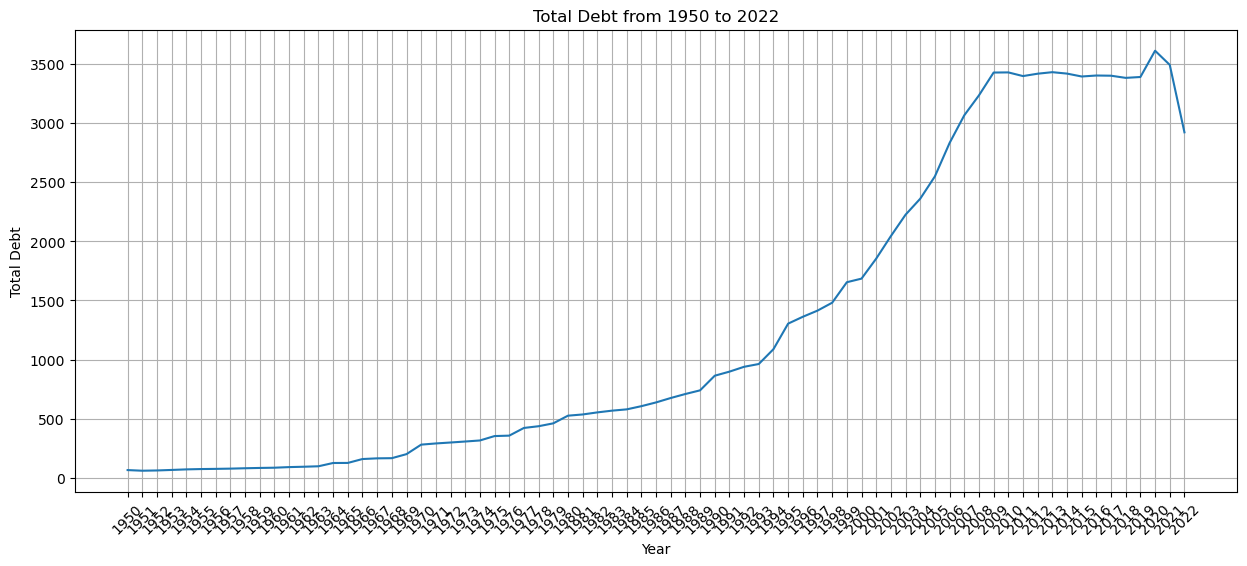

In [107]:
plot_debt_graph(household_debt)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


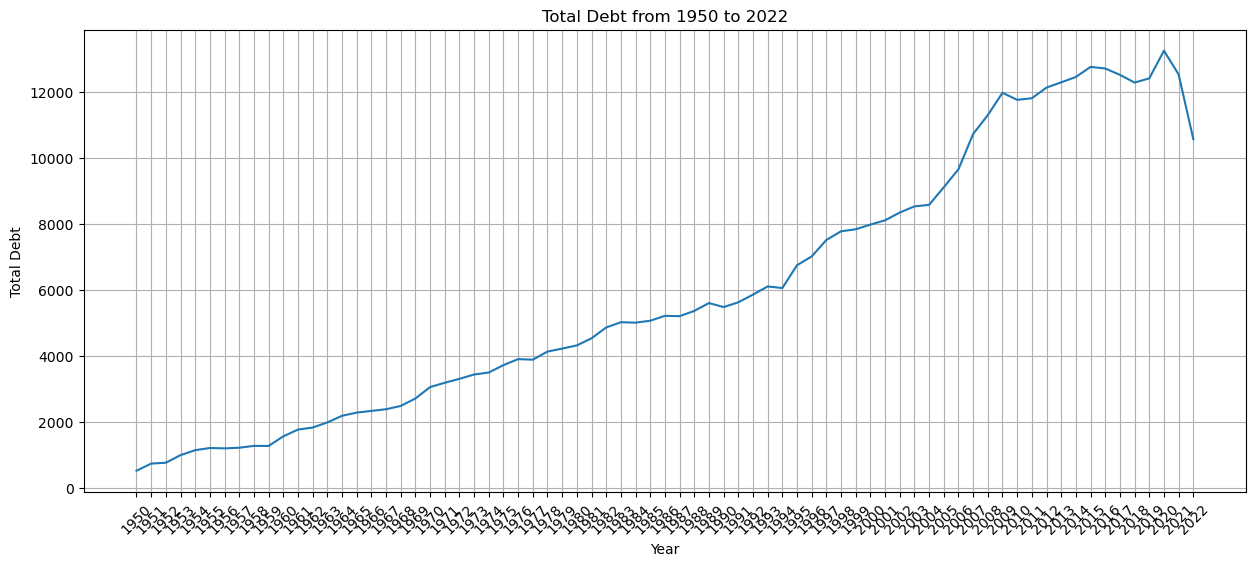

In [76]:
plot_debt_graph(private_debt)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


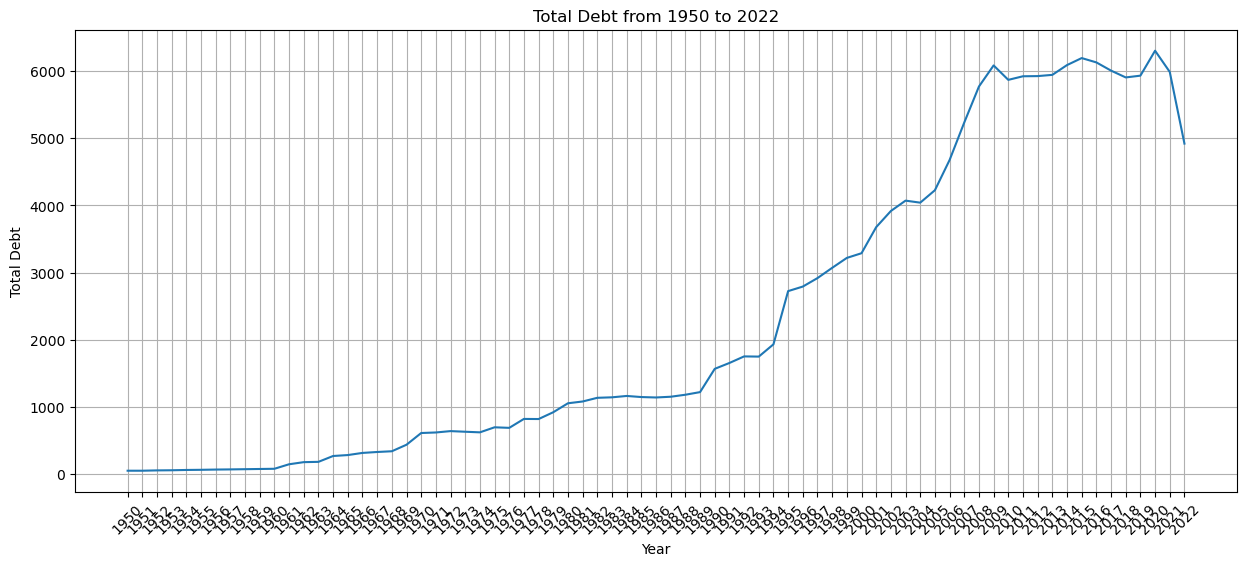

In [77]:
plot_debt_graph(non_financial_debt)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


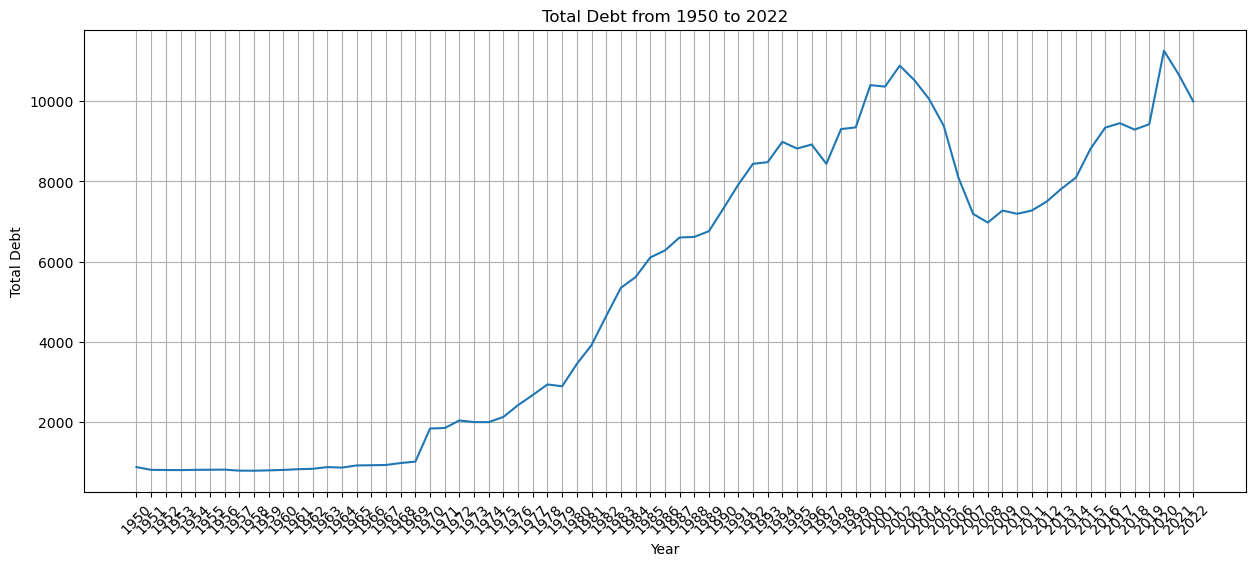

In [78]:
plot_debt_graph(centeral_government)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


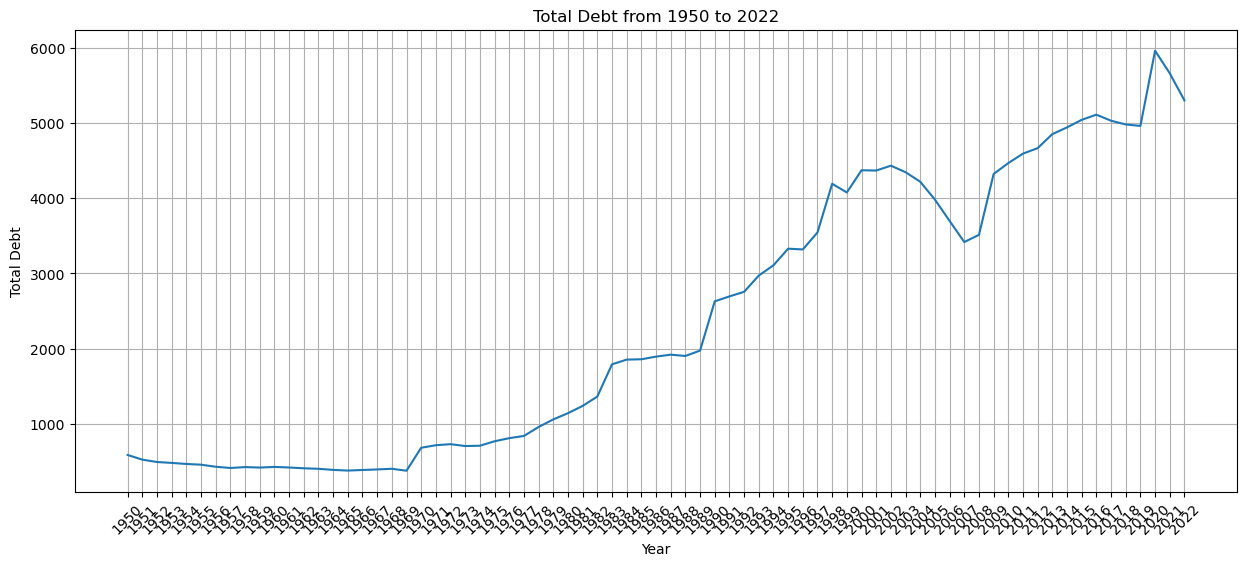

In [79]:
plot_debt_graph(general_government_debt)

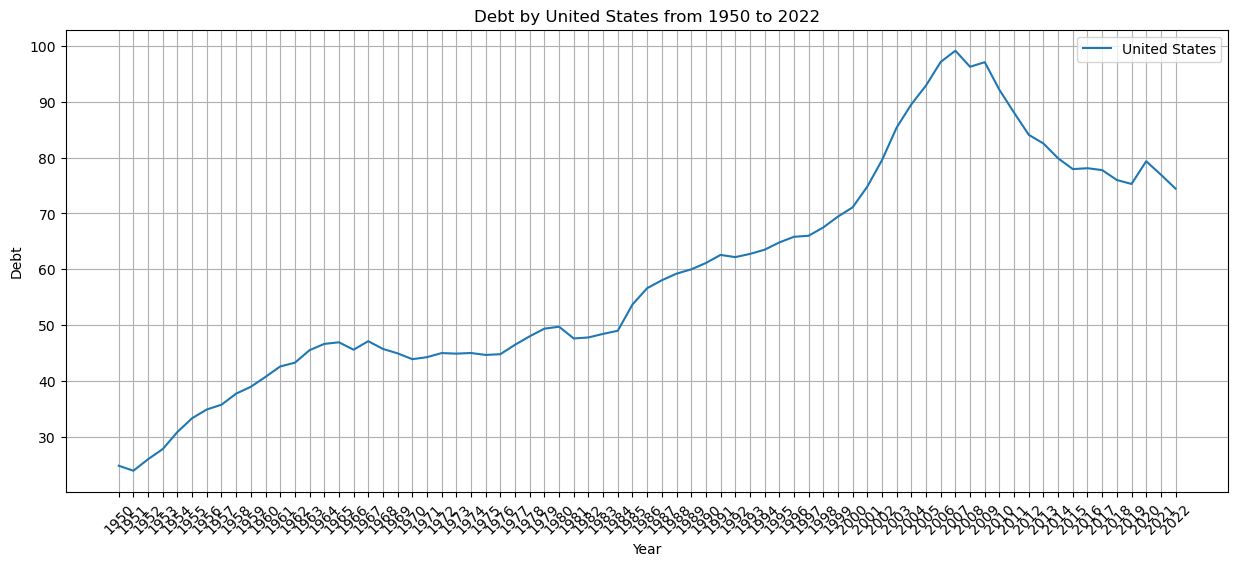

In [80]:
plot_by_country_name("United States", household_debt)

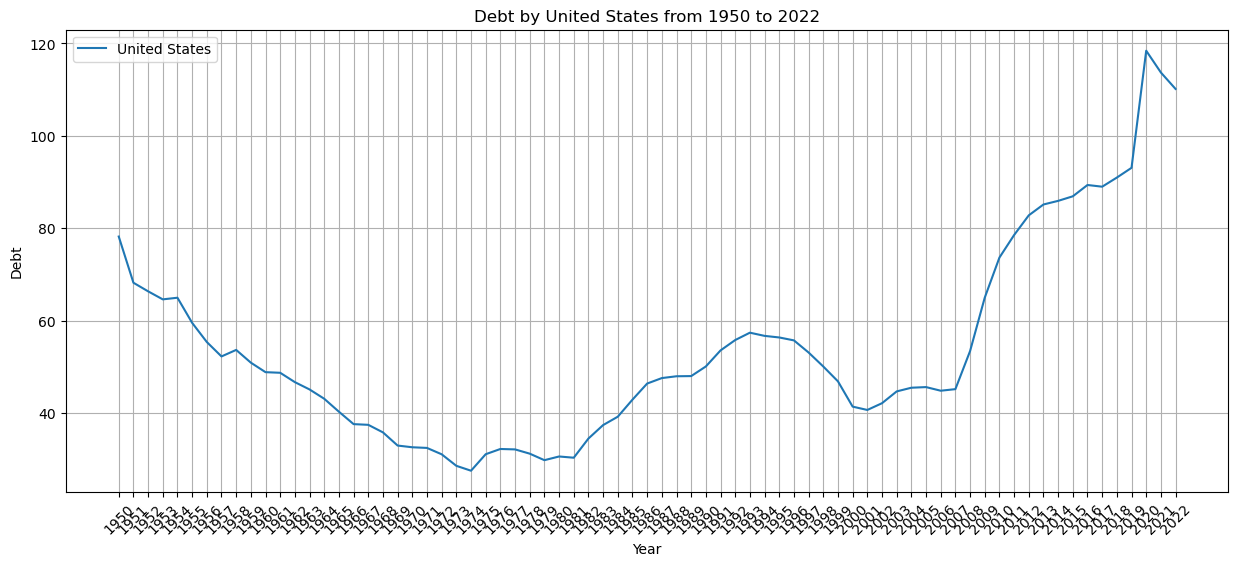

In [81]:
plot_by_country_name("United States", centeral_government)

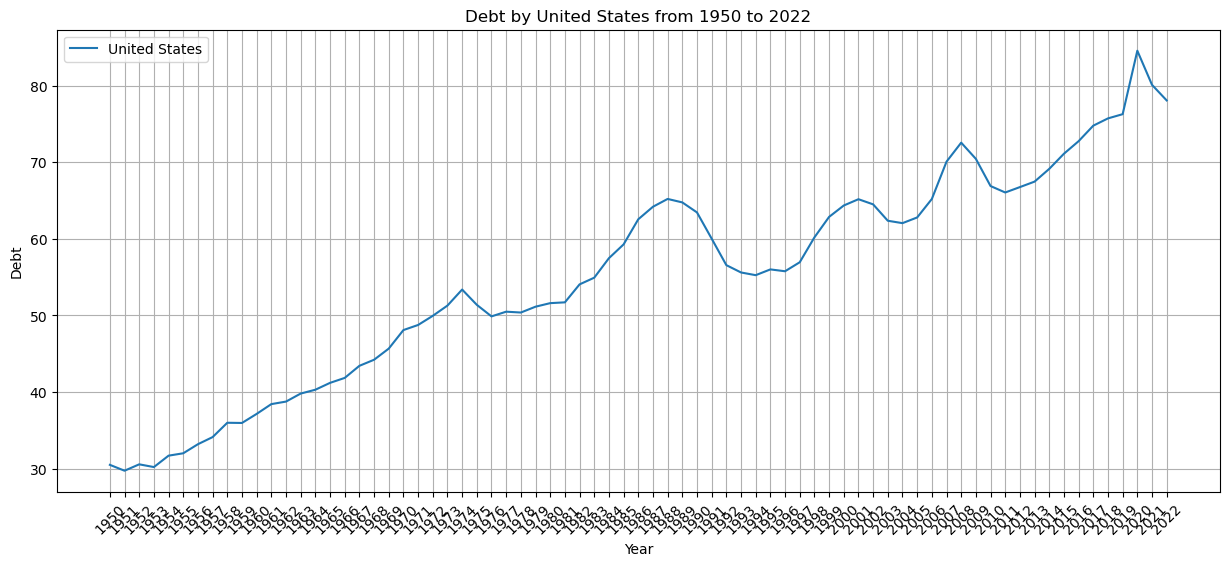

In [82]:
plot_by_country_name("United States", non_financial_debt)

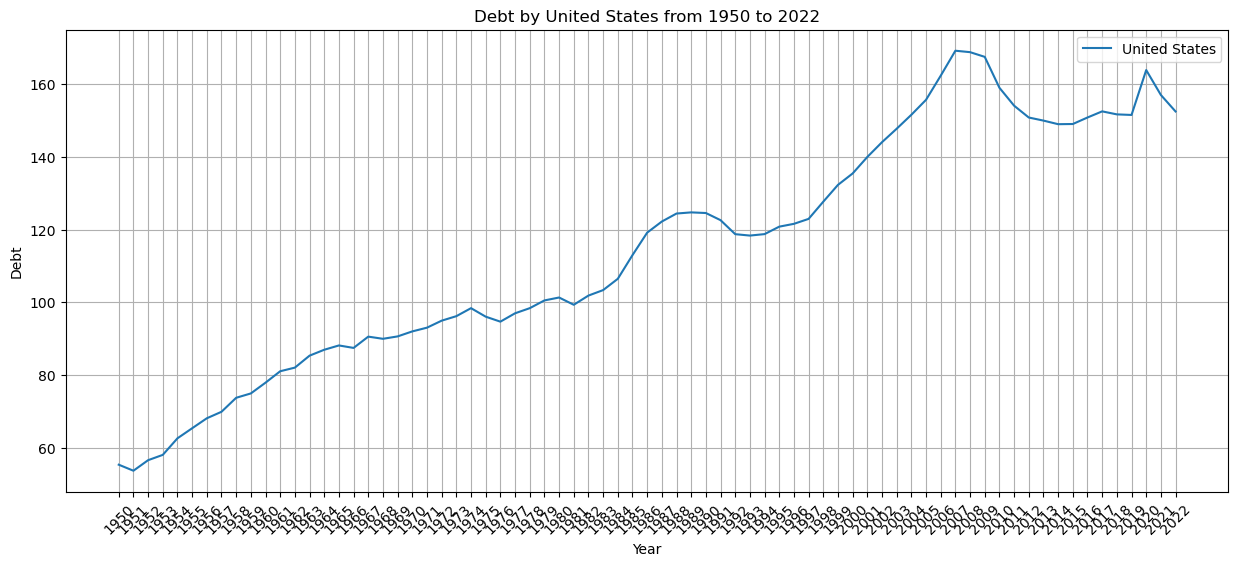

In [83]:
plot_by_country_name("United States", private_debt)

In [97]:
household_debt

,country,debt,1950,1951,1952,1953,1954,1955,1956,1957,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std
0,Afghanistan,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.697100,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,0.000000,0.000000,NaN
1,Albania,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.628963,12.295268,12.531274,NaN
2,Argentina,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.314137,5.510188,4.525431,4.074608,NaN
3,Australia,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.536449,121.059943,123.677817,122.988365,122.268566,119.082593,122.537046,118.208377,111.751978,NaN
4,Austria,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.242221,50.138075,50.230140,49.537066,48.926985,48.890197,52.442444,51.387583,48.187172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Ukraine,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.316687,8.795559,6.856581,5.842179,5.653822,5.353357,4.901668,4.672354,4.523612,NaN
80,United Arab Emirates,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.710653,24.321224,25.600513,23.534887,21.514673,21.654104,25.671165,22.806818,20.106850,NaN
81,United Kingdom,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.177177,86.589106,86.481457,85.827393,85.434155,84.000075,91.009028,86.881290,83.165809,NaN
82,United States,"Annual average of household debt, loans and de...",24.802614,23.91165,25.976296,27.794074,30.862721,33.318558,34.880478,35.738266,...,79.869920,77.942384,78.098646,77.759808,75.986963,75.276262,79.348115,76.944509,74.438409,NaN
